<a href="https://colab.research.google.com/github/MuizSarwar/learnML/blob/main/MLR(hands_on).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import all librariers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [2]:
#Load the dataset
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
#Define Target and Feature column
target_col = "MedHouseVal"
feature_cols = ["MedInc","HouseAge","AveRooms","AveBedrms","Population","AveOccup"]

X = df[feature_cols]
y = df[target_col]

In [ ]:
#Correlation matrix between featuers and target:
corr_matrix = df[feature_cols + [target_col]].corr()
corr_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,-0.023737
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,1.000000


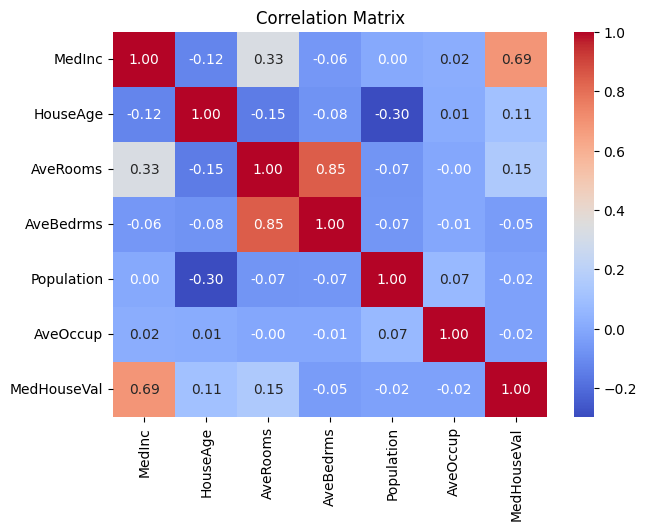

In [ ]:
#plot the correlation matrix
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#Train test split  and creat linearRegression model and fit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Find Intercept(bias term) and coefficients(weight)
intercept = lin_reg.intercept_
print(f"Intercept: {round(intercept,3)}")

for feature_name, coef in zip(feature_cols, lin_reg.coef_):
    print(f"{feature_name}: {round(coef,3)}")

Intercept: -0.553
MedInc: 0.546
HouseAge: 0.017
AveRooms: -0.224
AveBedrms: 1.115
Population: 0.0
AveOccup: -0.005


In [ ]:
#Make prediction on Train  , Test
y_test_pred = lin_reg.predict(X_test)
y_train_pred = lin_reg.predict(X_train)



In [ ]:
#Define helper function to print evaluation matrix:
def regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mse)

    print(f"MSE: {round(mse,3)}")
    print(f"MAE: {round(mae,3)}")
    print(f"RMSE: {round(rmse,3)}")
    print(f"R2: {round(r2,3)}")

regression_metrics(y_test, y_test_pred)
print()
regression_metrics(y_train, y_train_pred)

MSE: 0.642
MAE: 0.579
RMSE: 0.801
R2: 0.51

MSE: 0.607
MAE: 0.571
RMSE: 0.779
R2: 0.546


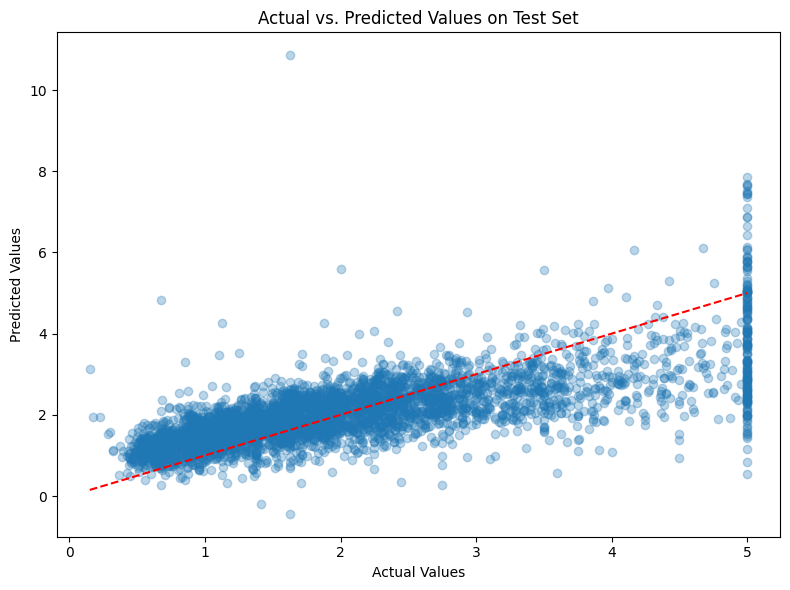

In [ ]:
#plot Predicted vs actual values on the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values on Test Set')

#diagonal reference line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],'--r')
plt.tight_layout()
plt.show()

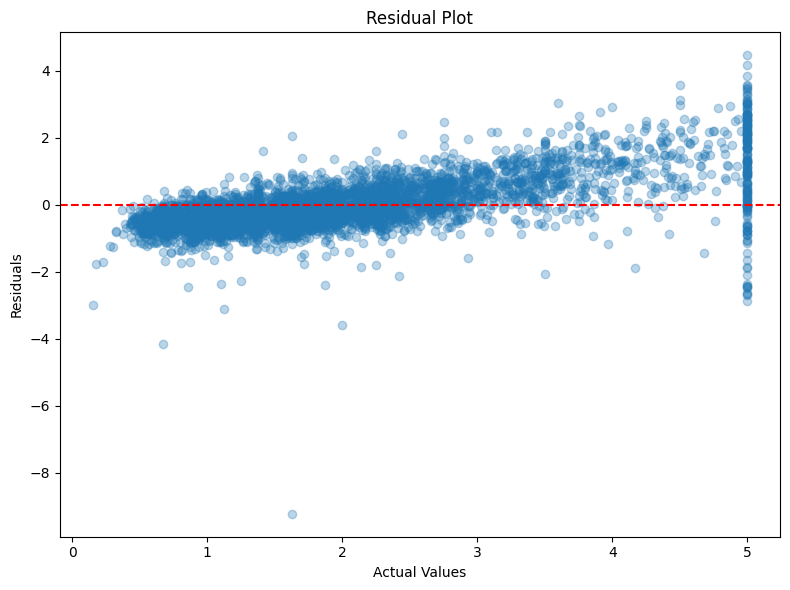

In [ ]:
#Residual plot:
residuals = y_test - y_test_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

###Here we can see that , LinearRegression is failing...
###Now,We will try it with ***Polynomial Regression***.

##Polynomial Regression for **`single feature`**:

In [17]:
#compare polynomial Regression model with different degrees on the single feature.
degrees = [1,2,3,4,5,6,7,8,9,10]
result = []

#for single feature
X_single = df[["MedInc"]]
y_single = df["MedHouseVal"]

#train test split
X_single_train, X_single_test, y_single_train, y_single_test = train_test_split(X_single, y_single, test_size=0.2, random_state=42)



for deg in degrees:
  model = Pipeline([
    ('poly', PolynomialFeatures(degree=deg,include_bias=False)),
    ('lin_reg', LinearRegression())
  ])

  model.fit(X_single_train,y_single_train)
  y_train_pred_deg = model.predict(X_single_train)
  y_test_pred_deg = model.predict(X_single_test)


  #matrics for train
  train_mse = mean_squared_error(y_single_train, y_train_pred_deg)
  train_mae = mean_absolute_error(y_single_train, y_train_pred_deg)
  train_r2 = r2_score(y_single_train, y_train_pred_deg)
  train_rmse = np.sqrt(train_mse)

  #matrics for test
  test_mse = mean_squared_error(y_single_test, y_test_pred_deg)
  test_mae = mean_absolute_error(y_single_test, y_test_pred_deg)
  test_r2 = r2_score(y_single_test, y_test_pred_deg)
  test_rmse = np.sqrt(test_mse)


  result.append(
      {
          "degree":deg,
          "train_mse":train_mse,
          "train_mae":train_mae,
          "train_r2":train_r2,
          "train_rmse":train_rmse,
          "test_mse":test_mse,
          "test_mae":test_mae,
          "test_r2":test_r2,
          "test_rmse":test_rmse
      }
  )


result_df = pd.DataFrame(result)
result_df


,degree,train_mse,train_mae,train_r2,train_rmse,test_mse,test_mae,test_r2,test_rmse
0,1,0.699145,0.624951,0.476993,0.836149,0.709116,0.629909,0.458859,0.842090
1,2,0.692989,0.624049,0.481598,0.832459,0.703273,0.628292,0.463318,0.838614
2,3,0.680680,0.615010,0.490806,0.825033,0.698296,0.621896,0.467116,0.835641
3,4,0.680542,0.615132,0.490909,0.824950,0.698104,0.621889,0.467262,0.835526
4,5,0.680368,0.614411,0.491039,0.824844,0.698716,0.621369,0.466796,0.835892
5,6,0.678843,0.613383,0.492180,0.823919,0.695970,0.619966,0.468891,0.834248
6,7,0.676124,0.612486,0.494214,0.822268,0.693144,0.618768,0.471047,0.832553
7,8,0.675940,0.612045,0.494352,0.822155,0.692699,0.618064,0.471387,0.832285
8,9,0.676362,0.612699,0.494036,0.822412,0.693436,0.618892,0.470825,0.832728
9,10,0.677865,0.613312,0.492911,0.823325,0.695799,0.619886,0.469022,0.834145


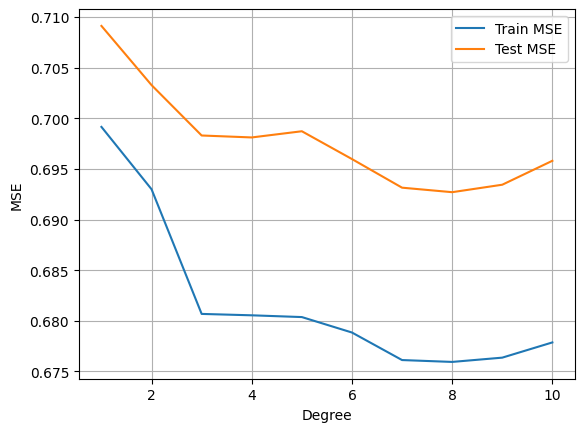

In [20]:
#MSE vs Degree plot
plt.plot(result_df["degree"],result_df["train_mse"] , label="Train MSE")
plt.plot(result_df["degree"], result_df["test_mse"], label="Test MSE")
plt.legend()
plt.grid(True)
plt.xlabel("Degree")
plt.ylabel("MSE")
plt.show()

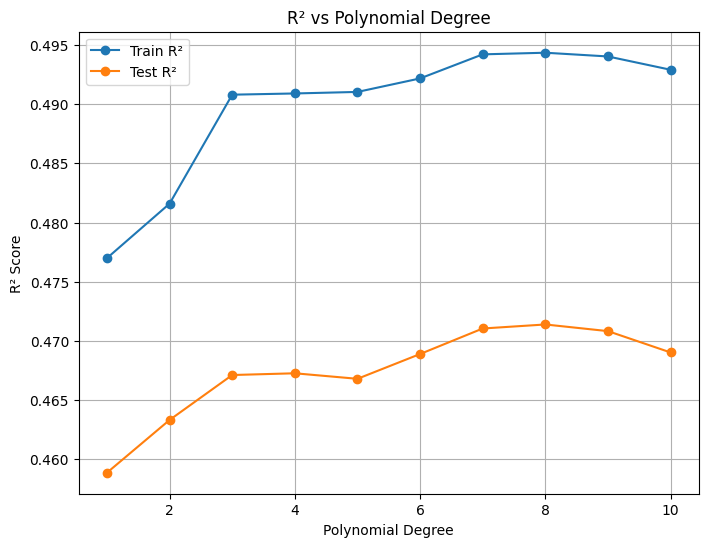

In [22]:
#R2 vs Degree plot
plt.figure(figsize=(8, 6))
plt.plot(result_df["degree"], result_df["train_r2"], marker='o', label="Train R²")
plt.plot(result_df["degree"], result_df["test_r2"], marker='o', label="Test R²")
plt.xlabel("Polynomial Degree")
plt.ylabel("R² Score")
plt.title("R² vs Polynomial Degree")
plt.legend()
plt.grid(True)


###From both -->  MSE vs Degree and R2 vs Degree plot,we can see that ***degree 8*** is the best place for this model.

##Polynomial Regression for **`all features`**:

In [24]:
#compare polynomial Regression model with different degrees on the all features.
degrees = [1,2,3,4,5,6,7,8,9,10]
result_all = []

#for single feature
X_all = df[["MedInc","HouseAge","AveRooms","AveBedrms","Population","AveOccup"]]
y_all = df["MedHouseVal"]

#train test split
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)



for deg in degrees:
  model = Pipeline([
    ('poly', PolynomialFeatures(degree=deg,include_bias=False)),
    ('lin_reg', LinearRegression())
  ])

  model.fit(X_all_train,y_all_train)
  y_train_pred_deg = model.predict(X_all_train)
  y_test_pred_deg = model.predict(X_all_test)


  #matrics for train
  train_mse = mean_squared_error(y_all_train, y_train_pred_deg)
  train_mae = mean_absolute_error(y_all_train, y_train_pred_deg)
  train_r2 = r2_score(y_all_train, y_train_pred_deg)
  train_rmse = np.sqrt(train_mse)

  #matrics for test
  test_mse = mean_squared_error(y_all_test, y_test_pred_deg)
  test_mae = mean_absolute_error(y_all_test, y_test_pred_deg)
  test_r2 = r2_score(y_all_test, y_test_pred_deg)
  test_rmse = np.sqrt(test_mse)


  result_all.append(
      {
          "degree":deg,
          "train_mse":train_mse,
          "train_mae":train_mae,
          "train_r2":train_r2,
          "train_rmse":train_rmse,
          "test_mse":test_mse,
          "test_mae":test_mae,
          "test_r2":test_r2,
          "test_rmse":test_rmse
      }
  )


result_df_all = pd.DataFrame(result_all)
result_df_all


KeyboardInterrupt: 